In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from surprise.prediction_algorithms.matrix_factorization import NMF,SVD

In [2]:
dataset = pd.read_csv('ratings.csv')

### Question 1

In [3]:
sparsity = dataset.shape[0]/(dataset['movieId'].nunique() * dataset['userId'].nunique())

In [4]:
print(sparsity)

0.016439141608663475


### Question 2

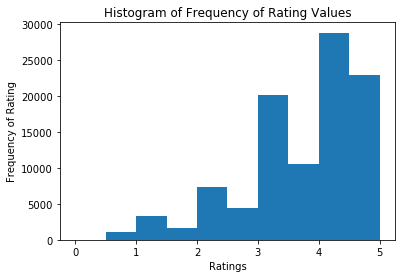

In [5]:
plt.hist(dataset['rating'],bins=np.arange(0, 5 + 0.5, 0.5))
plt.title('Histogram of Frequency of Rating Values')
plt.xlabel('Ratings')
plt.ylabel('Frequency of Rating')
plt.show()

### Question 3

In [6]:
movie_ids = dataset['movieId']
movie_ratings_dict = dict(Counter(movie_ids))

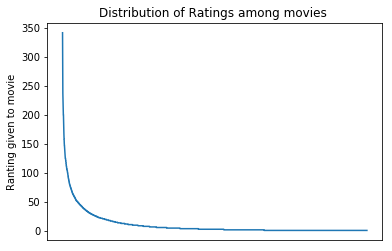

In [7]:
plt.plot(range(0,len(movie_ratings_dict.keys())), sorted(movie_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among movies ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ranting given to movie')
plt.show()

### Question 4

In [8]:
user_ids = dataset['userId']
user_ratings_dict = dict(Counter(user_ids))

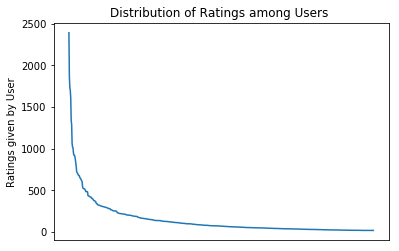

In [9]:
plt.plot(range(0,len(user_ratings_dict.keys())), sorted(user_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among Users ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ratings given by User')
plt.show()

### Question 5

In [10]:
sum(sorted(user_ratings_dict.values(),reverse=True)[:100])

55141

### Question 6

In [11]:
id_var = (dataset[['movieId','rating']].groupby('movieId',as_index=False)).var().fillna(0)
id_var_dict = dict(zip(list(id_var['movieId']), id_var['rating']))
var_list = list(dataset[['movieId','rating']].groupby('movieId').var()['rating'])

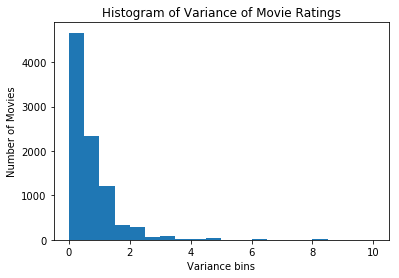

In [12]:
plt.hist(np.nan_to_num(var_list),bins=np.arange(min(var_list), max(var_list), 0.5))
plt.title('Histogram of Variance of Movie Ratings')
plt.ylabel('Number of Movies')
plt.xlabel('Variance bins')
plt.show()


In [13]:
def get_popular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    return [x for x in testset if x[1] in movieids]

def get_unpopular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    return [x for x in testset if x[1] in movieids]

def get_highvar(movie_ratings_dict, var_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    movieids = [x for x in movieids if var_dict[x]>=2 ]
    return [x for x in testset if x[1] in movieids]
    

## 4.5 k-NN Collaborative Filtering

In [81]:
def do_kFold(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    sim_options = {'name': 'pearson_baseline'}
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(0.5, 5))
    mae_d={}
    rmse_d={}
    for neigh in range_:
        print('Neighbors ',neigh)
        knn_model = KNNWithMeans( k=neigh, sim_options= sim_options)
        rmse_list=[]
        mae_list =[]
        #print(data_.)
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            knn_model.fit(trainset)
            predictions = knn_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[neigh]=sum(rmse_list)/len(rmse_list)
        mae_d[neigh]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

In [82]:
def rmse_mae_plot(rmse_d,mae_d,xl):
    plt.plot(list(rmse_d.keys()),list(rmse_d.values()))
    plt.xlabel(xl)
    plt.ylabel('Average RMSE')
    plt.title(xl+ ' Vs Average RMSE')
    plt.show()
    
    plt.plot(list(mae_d.keys()),list(mae_d.values()))
    plt.xlabel(xl)
    plt.ylabel('Average MAE')
    plt.title(xl+' Vs Average MAE')
    plt.show()

### Question 10

In [83]:
reader = Reader(rating_scale=(0.5, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
r_d,m_d = do_kFold(total_data, range(2,101,2),'notrim',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.91936729914
Mean mae 0.697314599828
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915879912334
Mean mae 0.694436841054
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915547086026
Mean mae 0.694369551161
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.917616616234
Mean mae 0.696540981328
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.917331768643
Mean mae 0.696144143217
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

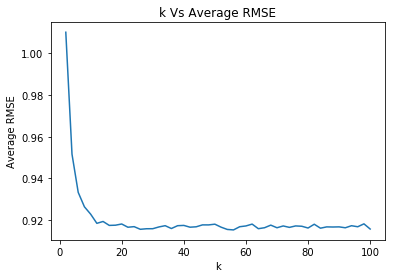

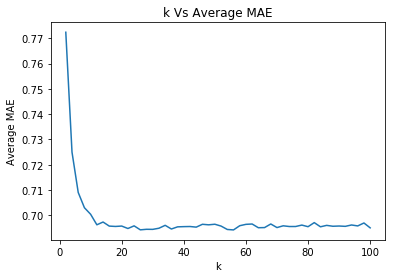

In [85]:
rmse_mae_plot(r_d,m_d,'k')

### Question 11

 k value =20


 RMSE = 0.9146735

### Question 12,13,14

In [86]:
rp_d, mp_d = do_kFold(total_data, range(2,101,2),'p',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rup_d,mup_d =do_kFold(total_data, range(2,101,2),'up',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rhv_d,mhv_d =do_kFold(total_data, range(2,101,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.903142515897
Mean mae 0.685558851166
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.899599973206
Mean mae 0.68300712882
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Do

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.8996014734
Mean mae 0.683380947562
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Est

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.900732987739
Mean mae 0.684063615366
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.90081245201
Mean mae 0.684425856889
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Do

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.16654219776
Mean mae 0.901856081147
Neighbors  10
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Co

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.17077174649
Mean mae 0.901304915684
Neighbors  36
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Do

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.17056248283
Mean mae 0.903656015242
Neighbors  50
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Co

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.17394037235
Mean mae 0.90814232752
Neighbors  76
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Est

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.1639353251
Mean mae 0.899659332953
Neighbors  90
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Don

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.58735124092
Mean mae 1.27194939059
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Com

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.59738400988
Mean mae 1.27132015584
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Don

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.58857637955
Mean mae 1.26889243992
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Com

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.59596710891
Mean mae 1.27568933349
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Don

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 1.61141456345
Mean mae 1.29497542866
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Com

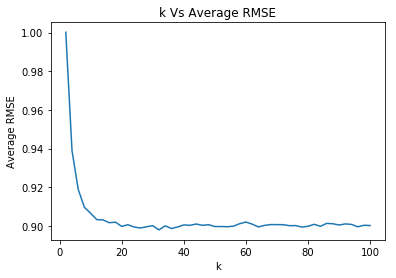

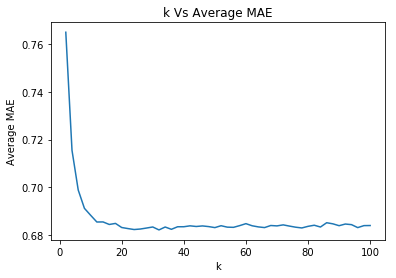

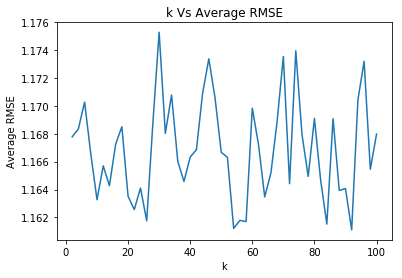

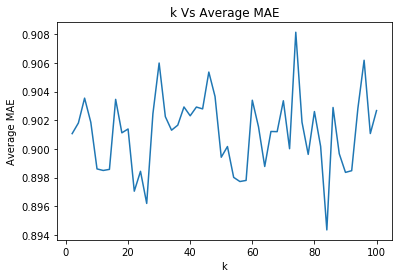

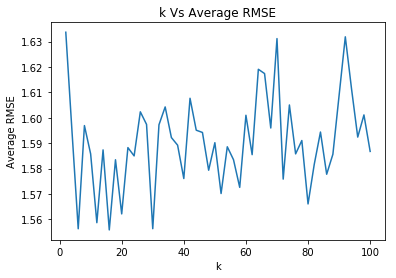

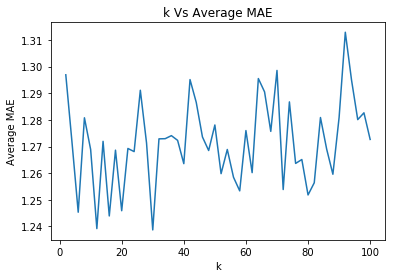

In [87]:
rmse_mae_plot(rp_d,mp_d,'k')
rmse_mae_plot(rup_d,mup_d,'k')
rmse_mae_plot(rhv_d,mhv_d,'k')

## NNNMF

In [88]:
def NMF_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(0.5, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        nmf_model = NMF(n_factors = latent_factors,random_state=42)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            nmf_model.fit(trainset)
            predictions = nmf_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 17

In [89]:
reader = Reader(rating_scale=(0.5, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
nmf_rmse , nmf_mae = NMF_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict) #replace 8 with 2

Number of Latent Factors :  2
Mean rmse 1.18144649978
Mean mae 0.999116771664
Number of Latent Factors :  4
Mean rmse 1.07055772176
Mean mae 0.88066161151
Number of Latent Factors :  6
Mean rmse 1.01378319207
Mean mae 0.816533033255
Number of Latent Factors :  8
Mean rmse 0.976128615979
Mean mae 0.772563328191
Number of Latent Factors :  10
Mean rmse 0.958625653039
Mean mae 0.749693257837
Number of Latent Factors :  12
Mean rmse 0.948505069147
Mean mae 0.735156451477
Number of Latent Factors :  14
Mean rmse 0.942530123144
Mean mae 0.725985216581
Number of Latent Factors :  16
Mean rmse 0.938655937569
Mean mae 0.718945109657
Number of Latent Factors :  18
Mean rmse 0.94027631831
Mean mae 0.717543948808
Number of Latent Factors :  20
Mean rmse 0.940468254141
Mean mae 0.714502546718
Number of Latent Factors :  22
Mean rmse 0.944582956414
Mean mae 0.715126315203
Number of Latent Factors :  24
Mean rmse 0.946449577358
Mean mae 0.715876964887
Number of Latent Factors :  26
Mean rmse 0.950043

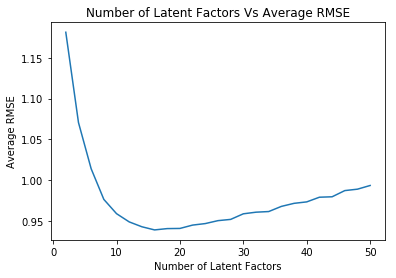

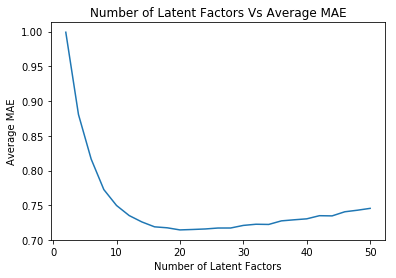

In [90]:
rmse_mae_plot(nmf_rmse,nmf_mae,'Number of Latent Factors')

### Question 18

In [91]:
print("Minimum Average RMSE : ",min(nmf_rmse.values()))
print("Minimum Average MAE : ",min(nmf_mae.values()))
best_n_factors = [k for k,v in nmf_rmse.items() if v == min(nmf_rmse.values())]
best_n_factors_nmf = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_nmf)

Minimum Average RMSE :  0.938655937569
Minimum Average MAE :  0.714502546718
Best number of latent factors :  16


### Question 19 20 21

In [92]:
print("-----Popular Movies Testset-----")
nmf_rmse_p , nmf_mae_p = NMF_filter(total_data, range(2,51,2),'p',movie_ratings_dict) #replace 8 with 2
print("-----Unpopular Movies Testset-----")
nmf_rmse_up , nmf_mae_up = NMF_filter(total_data, range(2,51,2),'up',movie_ratings_dict) #replace 8 with 2

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.1722446638
Mean mae 0.994949680966
Number of Latent Factors :  4
Mean rmse 1.05716602039
Mean mae 0.873414161569
Number of Latent Factors :  6
Mean rmse 0.991791769498
Mean mae 0.800935136423
Number of Latent Factors :  8
Mean rmse 0.957520248254
Mean mae 0.760696053166
Number of Latent Factors :  10
Mean rmse 0.942311766643
Mean mae 0.740717506493
Number of Latent Factors :  12
Mean rmse 0.927194452957
Mean mae 0.720834986833
Number of Latent Factors :  14
Mean rmse 0.922364286053
Mean mae 0.711921186818
Number of Latent Factors :  16
Mean rmse 0.917284176766
Mean mae 0.703399294199
Number of Latent Factors :  18
Mean rmse 0.918384554174
Mean mae 0.701850147112
Number of Latent Factors :  20
Mean rmse 0.918435064182
Mean mae 0.698644887921
Number of Latent Factors :  22
Mean rmse 0.923861616366
Mean mae 0.701516097654
Number of Latent Factors :  24
Mean rmse 0.92623741364
Mean mae 0.700462741671
Number of Laten

In [93]:
print("-----High Variance Movies Testset-----")
nmf_rmse_hv , nmf_mae_hv = NMF_filter(total_data, range(2,51,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict) #replace 8 with 2

-----High Variance Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.68685388477
Mean mae 1.44449728504
Number of Latent Factors :  4
Mean rmse 1.59950576552
Mean mae 1.35678452233
Number of Latent Factors :  6
Mean rmse 1.60744059548
Mean mae 1.33753278534
Number of Latent Factors :  8
Mean rmse 1.58277710165
Mean mae 1.32671587432
Number of Latent Factors :  10
Mean rmse 1.61598126586
Mean mae 1.35610624747
Number of Latent Factors :  12
Mean rmse 1.58545953471
Mean mae 1.31861370129
Number of Latent Factors :  14
Mean rmse 1.56368601831
Mean mae 1.2987116277
Number of Latent Factors :  16
Mean rmse 1.59710359525
Mean mae 1.31740381954
Number of Latent Factors :  18
Mean rmse 1.5614747503
Mean mae 1.28690905044
Number of Latent Factors :  20
Mean rmse 1.59072650205
Mean mae 1.31026210974
Number of Latent Factors :  22
Mean rmse 1.56796901531
Mean mae 1.289743436
Number of Latent Factors :  24
Mean rmse 1.59120848642
Mean mae 1.31272920011
Number of Latent Factors :  26
Me

-----Popular Movies Testset-----


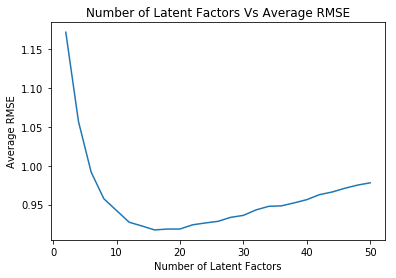

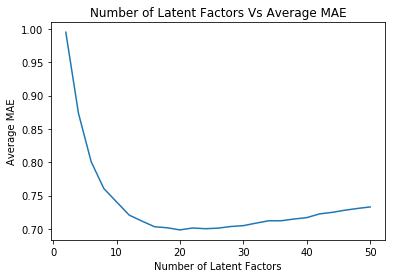

Minimum Average RMSE :  0.917284176766
Minimum Average MAE :  0.698644887921
-----Unpopular Movies Testset-----


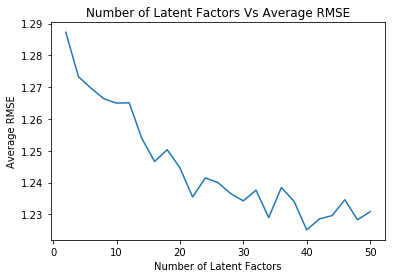

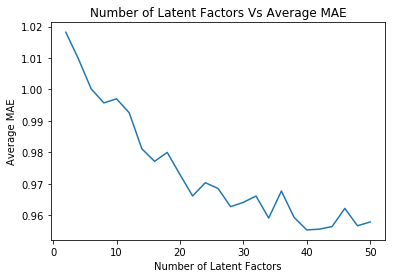

Minimum Average RMSE :  1.22509275511
Minimum Average MAE :  0.955299370409
-----High Variance Movies Testset-----


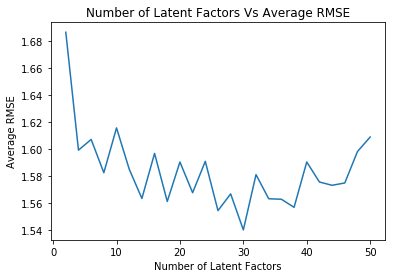

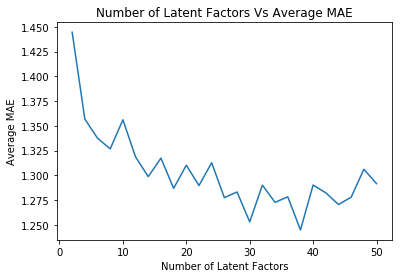

Minimum Average RMSE :  1.54040300093
Minimum Average MAE :  1.24493245252


In [94]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(nmf_rmse_p,nmf_mae_p,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(nmf_rmse_p.values()))
print("Minimum Average MAE : ",min(nmf_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(nmf_rmse_up,nmf_mae_up,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(nmf_rmse_up.values()))
print("Minimum Average MAE : ",min(nmf_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(nmf_rmse_hv,nmf_mae_hv,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(nmf_rmse_hv.values()))
print("Minimum Average MAE : ",min(nmf_mae_hv.values()))

### Question 22

In [95]:
def plot_roc(fpr, tpr, roc_auc, threshold_value):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

In [96]:
def plot_roc_curves(testset,preds,thresholds_arr):
    for threshold_value in thresholds_arr:
        y_test = []
        y_preds = []
        for x in testset:
            if x[2] < threshold_value:
                y_test.append(0)
            else:
                y_test.append(1)
        for i in range(len(preds)):
            y_preds.append(preds[i][3])
        fpr, tpr, thresholds = roc_curve(y_test, y_preds)
        roc_auc = auc(fpr, tpr)
        plot_roc(fpr,tpr, roc_auc,threshold_value)

In [97]:
reader = Reader(rating_scale=(0.5, 5))
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 0)
roc_nmf_model = NMF(n_factors = best_n_factors_nmf,random_state=42)
roc_nmf_model.fit(train_set)
preds = roc_nmf_model.test(test_set)

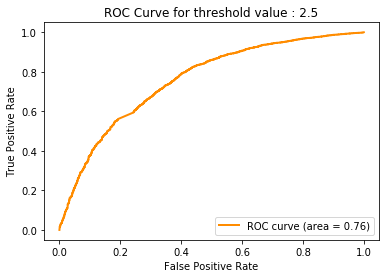

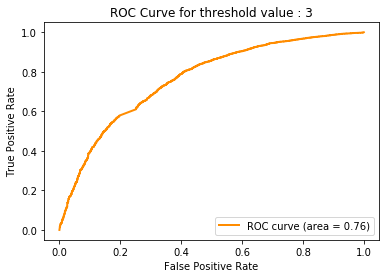

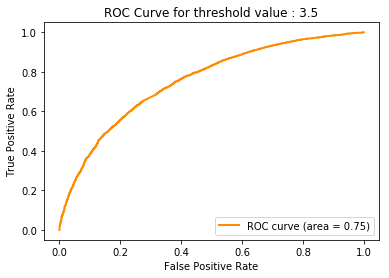

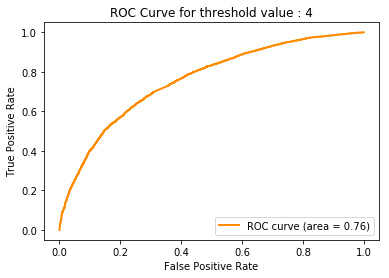

In [98]:
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

### Question 23

In [99]:
algo = NMF(n_factors = 20, random_state=42)
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
trainset = data.build_full_trainset()
algo.fit(trainset)
v = algo.qi
top_ids = [[] for _ in range(20)]
for i in range(0,v.shape[1]):
    top_ids[i].append(np.argsort(v[:,i]))

In [100]:
arr = dataset['movieId'].values
indexes = np.unique(arr,return_index = True)[1]
movie_list = [arr[i] for i in sorted(indexes)]


In [101]:
movies_data = pd.read_csv('movies.csv')
movie_genre = movies_data[['movieId','genres']]

In [102]:
for col_num in range(0,5):
    print("Genres for column ",col_num," : ")
    top10 = []
    genres = []
    movies_true_ids = []
    a = top_ids[col_num]
    for i in range(0,10):
        top10.append(a[0][i])
        movies_true_ids.append(movie_list[top10[i]])
        genres.append(list(movie_genre.iloc[movie_genre.index[movie_genre['movieId'] == movies_true_ids[i]]]['genres'].values))
    print(genres)

Genres for column  0  : 
[['Adventure|Children|Drama'], ['Comedy|Thriller'], ['Action|Adventure|Comedy|Fantasy'], ['Drama|Mystery|Romance'], ['Drama|Fantasy|Sci-Fi'], ['Crime|Thriller'], ['Children|Comedy'], ['Documentary'], ['Action|Crime'], ['Horror|Thriller']]
Genres for column  1  : 
[['Action'], ['Adventure|Drama|Fantasy|Romance'], ['Action|Adventure|Children|Fantasy'], ['Children|Comedy'], ['Comedy'], ['Drama|Musical|Romance'], ['Comedy|Fantasy|Musical|Romance'], ['Action|Sci-Fi'], ['Action|Drama'], ['Action|Drama|Thriller']]
Genres for column  2  : 
[['Action|Adventure|Children|Comedy|Mystery'], ['Comedy|Musical|Romance'], ['Adventure|Children|Fantasy'], ['Comedy'], ['Comedy'], ['Adventure|Children|Drama'], ['Comedy'], ['Horror|Sci-Fi'], ['Comedy'], ['Horror']]
Genres for column  3  : 
[['Horror|Sci-Fi'], ['Action|Drama|Thriller'], ['Comedy|Musical'], ['Animation|Comedy|Fantasy'], ['Drama|Musical'], ['Action|Adventure|Children|Fantasy'], ['Adventure|Drama|Fantasy|Romance'], ['Co

## Matrix Factorization with bias

In [103]:
def SVD_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits)
    reader = Reader(rating_scale=(0.5, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        svd_model = SVD(n_factors = latent_factors,random_state=42)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict, id_var_dict, testset)
            svd_model.fit(trainset)
            predictions = svd_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 24

In [104]:
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
svd_rmse , svd_mae = SVD_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict)

Number of Latent Factors :  2
Mean rmse 0.887472596994
Mean mae 0.68331674279
Number of Latent Factors :  4
Mean rmse 0.88765439393
Mean mae 0.68368923637
Number of Latent Factors :  6
Mean rmse 0.885907526399
Mean mae 0.682262342875
Number of Latent Factors :  8
Mean rmse 0.887563973674
Mean mae 0.683574966063
Number of Latent Factors :  10
Mean rmse 0.888439165921
Mean mae 0.683861925393
Number of Latent Factors :  12
Mean rmse 0.88712796536
Mean mae 0.682388557367
Number of Latent Factors :  14
Mean rmse 0.887697638532
Mean mae 0.68324683733
Number of Latent Factors :  16
Mean rmse 0.887884728225
Mean mae 0.683321320852
Number of Latent Factors :  18
Mean rmse 0.888813299858
Mean mae 0.683661043941
Number of Latent Factors :  20
Mean rmse 0.887691077142
Mean mae 0.68348406186
Number of Latent Factors :  22
Mean rmse 0.888867628118
Mean mae 0.683981567774
Number of Latent Factors :  24
Mean rmse 0.889323816815
Mean mae 0.684755625503
Number of Latent Factors :  26
Mean rmse 0.8888222

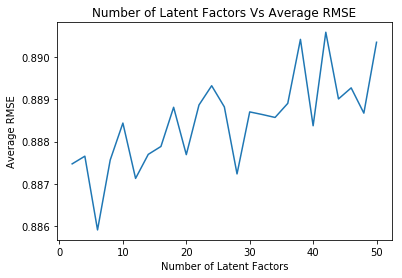

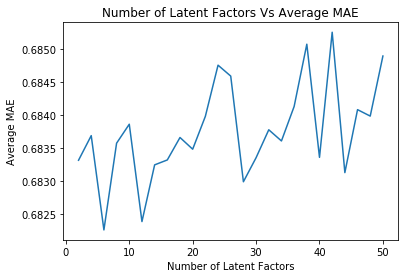

In [105]:
rmse_mae_plot(svd_rmse,svd_mae,'Number of Latent Factors')

### Question 25

In [106]:
print("Minimum Average RMSE : ",min(svd_rmse.values()))
print("Minimum Average MAE : ",min(svd_mae.values()))
best_n_factors = [k for k,v in svd_rmse.items() if v == min(svd_rmse.values())]
best_n_factors_svd = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_svd)

Minimum Average RMSE :  0.885907526399
Minimum Average MAE :  0.682262342875
Best number of latent factors :  6


### Question 26,27,28

In [107]:
print("-----Popular Movies Testset-----")
svd_rmse_p , svd_mae_p = SVD_filter(total_data, range(2,51,2),'p',movie_ratings_dict)

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.879823035746
Mean mae 0.677733524214
Number of Latent Factors :  4
Mean rmse 0.879932653209
Mean mae 0.677795497244
Number of Latent Factors :  6
Mean rmse 0.879294582351
Mean mae 0.67698762308
Number of Latent Factors :  8
Mean rmse 0.879645688789
Mean mae 0.677152043411
Number of Latent Factors :  10
Mean rmse 0.87945554253
Mean mae 0.676766043719
Number of Latent Factors :  12
Mean rmse 0.88020739874
Mean mae 0.677496506991
Number of Latent Factors :  14
Mean rmse 0.879348242118
Mean mae 0.677228962337
Number of Latent Factors :  16
Mean rmse 0.880021440983
Mean mae 0.677412551408
Number of Latent Factors :  18
Mean rmse 0.880720979442
Mean mae 0.677891653824
Number of Latent Factors :  20
Mean rmse 0.880978742269
Mean mae 0.678053790369
Number of Latent Factors :  22
Mean rmse 0.881595465226
Mean mae 0.67841058432
Number of Latent Factors :  24
Mean rmse 0.880342025836
Mean mae 0.676948168381
Number of Laten

In [108]:
print("-----Unpopular Movies Testset-----")
svd_rmse_up , svd_mae_up = SVD_filter(total_data, range(2,51,2),'up',movie_ratings_dict) 

-----Unpopular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.00983418324
Mean mae 0.788746806654
Number of Latent Factors :  4
Mean rmse 1.00897876221
Mean mae 0.78424331629
Number of Latent Factors :  6
Mean rmse 1.01056724039
Mean mae 0.786132586993
Number of Latent Factors :  8
Mean rmse 1.01030384259
Mean mae 0.787657943437
Number of Latent Factors :  10
Mean rmse 1.00987019089
Mean mae 0.785832869979
Number of Latent Factors :  12
Mean rmse 1.01065965535
Mean mae 0.786833110254
Number of Latent Factors :  14
Mean rmse 1.01106844681
Mean mae 0.788272439513
Number of Latent Factors :  16
Mean rmse 1.01471691486
Mean mae 0.791200798436
Number of Latent Factors :  18
Mean rmse 1.00986606669
Mean mae 0.787163902127
Number of Latent Factors :  20
Mean rmse 1.01340008962
Mean mae 0.790373528341
Number of Latent Factors :  22
Mean rmse 1.0130887515
Mean mae 0.78836571243
Number of Latent Factors :  24
Mean rmse 1.01047716772
Mean mae 0.786757172522
Number of Latent Factors

In [109]:
print("-----High Variance Movies Testset-----")
svd_rmse_hv , svd_mae_hv = SVD_filter(total_data, range(2,51,2),'hv',movie_ratings_dict, id_var_dict=id_var_dict)

-----High Variance Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.41721992271
Mean mae 1.18740684099
Number of Latent Factors :  4
Mean rmse 1.41543678818
Mean mae 1.18618518989
Number of Latent Factors :  6
Mean rmse 1.41750242154
Mean mae 1.18557799313
Number of Latent Factors :  8
Mean rmse 1.41672243791
Mean mae 1.18420235471
Number of Latent Factors :  10
Mean rmse 1.41638172009
Mean mae 1.18311457394
Number of Latent Factors :  12
Mean rmse 1.43317488016
Mean mae 1.1999632684
Number of Latent Factors :  14
Mean rmse 1.41242102892
Mean mae 1.18980165116
Number of Latent Factors :  16
Mean rmse 1.41628296026
Mean mae 1.18693569521
Number of Latent Factors :  18
Mean rmse 1.42656108198
Mean mae 1.18711789437
Number of Latent Factors :  20
Mean rmse 1.4307264717
Mean mae 1.19460327966
Number of Latent Factors :  22
Mean rmse 1.41302213529
Mean mae 1.1812633106
Number of Latent Factors :  24
Mean rmse 1.42337381708
Mean mae 1.1883808624
Number of Latent Factors :  26
Me

-----Popular Movies Testset-----


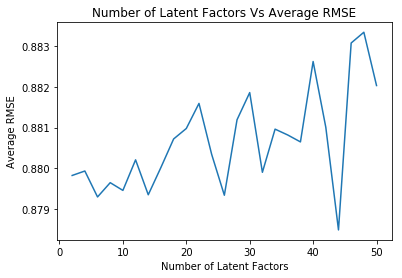

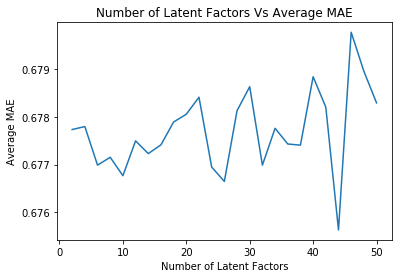

Minimum Average RMSE :  0.878483529199
Minimum Average MAE :  0.675629887538
-----Unpopular Movies Testset-----


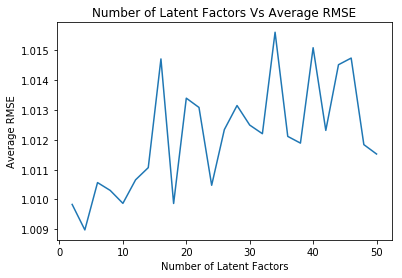

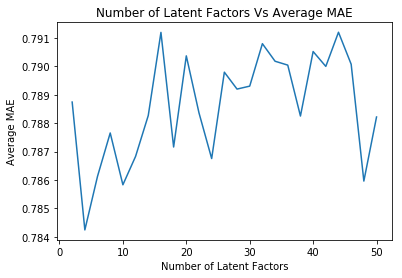

Minimum Average RMSE :  1.00897876221
Minimum Average MAE :  0.78424331629
-----High Variance Movies Testset-----


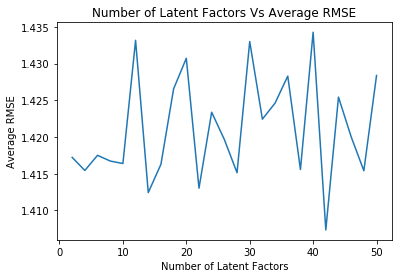

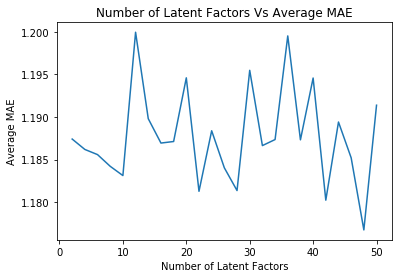

Minimum Average RMSE :  1.40733330307
Minimum Average MAE :  1.17672474954


In [110]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(svd_rmse_p,svd_mae_p,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(svd_rmse_p.values()))
print("Minimum Average MAE : ",min(svd_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(svd_rmse_up,svd_mae_up,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(svd_rmse_up.values()))
print("Minimum Average MAE : ",min(svd_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(svd_rmse_hv,svd_mae_hv,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(svd_rmse_hv.values()))
print("Minimum Average MAE : ",min(svd_mae_hv.values()))

### Question 29

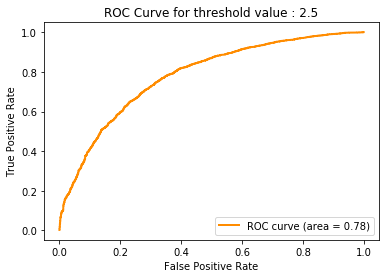

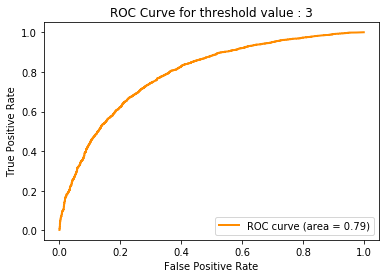

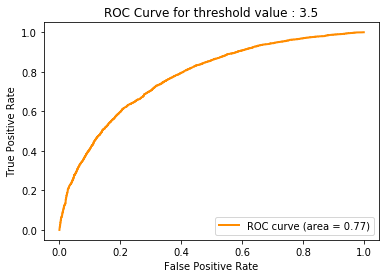

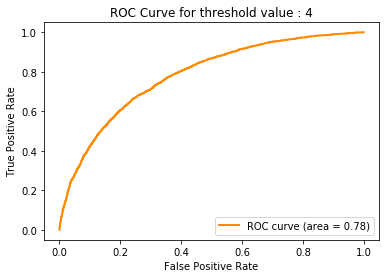

In [111]:
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 42)
roc_svd_model = SVD(n_factors = best_n_factors_svd,random_state=42)
roc_svd_model.fit(train_set)
preds = roc_svd_model.test(test_set)
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

## Naive Collaborative filtering

In [112]:
from sklearn.model_selection import KFold

In [113]:
# Function that returns mean rating of the user
def mean_rating(user):
    user_dataset = dataset.loc[dataset['userId'] == user]
    l = len(user_dataset)
    rating_sum = np.sum(user_dataset['rating'])
    return rating_sum/l

In [114]:
mean_rating(1)

2.55

In [115]:
def get_popular_dataset(testset):
    popular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    popular_movie_dataset = dataset.loc[dataset['movieId'].isin(popular_movieids)]
    return popular_movie_dataset

def get_unpopular_dataset(testset):
    unpopular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    unpopular_movie_dataset = dataset.loc[dataset['movieId'].isin(unpopular_movieids)]
    return unpopular_movie_dataset

def get_highvar_dataset(testset):
    high_variance_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    high_variance_movieids = [x for x in high_variance_movieids if id_var_dict[x]>=2 ]
    highvar_movie_dataset = dataset.loc[dataset['movieId'].isin(high_variance_movieids)]
    return highvar_movie_dataset

In [116]:
def rmse(preds, true_vals):
    change = preds-true_vals
    rms = np.sum(c*c for c in change)/len(preds)
    return np.sqrt(rms)

In [117]:
def naive_cf(df, subset):
    error = []
    for i in range(10):
        kf = KFold(n_splits = 10, shuffle = True)
        result = next(kf.split(df), None)
        train = df.iloc[result[0]]
        test =  df.iloc[result[1]]
        if subset == 'entire':
            test2 = test
        if subset == 'popular':
            test2 = get_popular_dataset(test)
        if subset == 'unpopular':
            test2 = get_unpopular_dataset(test)
        if subset == 'highvar':
            test2 = get_highvar_dataset(test)
        predictions = [mean_rating(i) for i in test2['userId']]
        error.append(rmse(predictions, test2['rating']))
    print("RMSE 10-fold cross validation: ", np.sum(error)/10)

### Question 30

In [118]:
# Question 30
print("Entire dataset")
naive_cf(dataset, "entire")

Entire dataset
RMSE 10-fold cross validation:  0.955080158661


### Question 31 - 33

In [119]:
# Question 31
print("Popular movie dataset")
naive_cf(dataset, "popular")

Popular movie dataset
RMSE 10-fold cross validation:  0.952145551689


In [120]:
# Question 32
print("Unpopular movie dataset")
naive_cf(dataset, "unpopular")

Unpopular movie dataset
RMSE 10-fold cross validation:  1.01063226017


In [121]:
# Question 33
print("High variance movie dataset")
naive_cf(dataset, "highvar")

High variance movie dataset
RMSE 10-fold cross validation:  1.43354557046


### Question 34

In [122]:
# Question 34 
def roc_plot_requirements(testset, preds, threshold_value):
    y_test = []
    y_preds = []
    
    for x in testset:
        if x[2] < threshold_value:
            y_test.append(0)
        else:
            y_test.append(1)
    for i in range(len(preds)):
        y_preds.append(preds[i][3])
        
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

def plot_roc_combined(algos, threshold_value):
    data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
    trainset, testset = train_test_split(data_roc, test_size = 0.1, random_state = 0)
    plt.figure()
    lw = 2
    for algo in algos:
        if algo == 'knn':
            sim_options = {'name': 'pearson_baseline'}
            algo = KNNWithMeans(k=20, sim_options=sim_options)   # k = 20 (from Q11)
            algo.fit(trainset)
            predictions = algo.test(testset)
            fpr, tpr, roc_auc = roc_plot_requirements(testset, predictions, threshold_value)
            plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
        if algo == 'nnmf':
            algo = NMF(n_factors = best_n_factors_nmf)     
            algo.fit(trainset)
            predictions = algo.test(testset)
            fpr, tpr, roc_auc = roc_plot_requirements(testset, predictions, threshold_value)
            plt.plot(fpr, tpr, color='blue',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
        if algo == 'mf':
            algo = SVD(n_factors = best_n_factors_svd)  
            algo.fit(trainset)
            predictions = algo.test(testset)
            fpr, tpr, roc_auc = roc_plot_requirements(testset, predictions, threshold_value)
            plt.plot(fpr, tpr, color='red',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
            
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


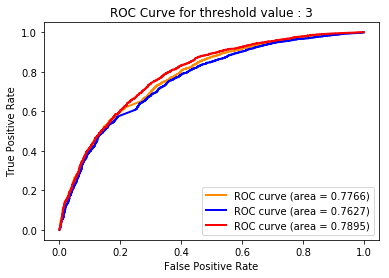

In [123]:
algos = ['knn', 'nnmf', 'mf']
plot_roc_combined(algos, 3)

In [124]:
user_ids = dataset['userId'].unique()

In [125]:
user_movie_rating = dataset[['userId', 'movieId', 'rating']].fillna(0)

In [126]:
dataset.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [127]:
user_movie_rating_new = user_movie_rating[user_movie_rating.rating > 3]   # threshold for ground truth values = 3

In [128]:
user_movie_rating_new['movieId'].nunique()

6993

In [129]:
user_movies_dict = {}  # ground truth values for users
for uid in user_ids:
    df = user_movie_rating_new[user_movie_rating_new.userId == uid]
    if uid in user_movies_dict:
        user_movies_dict[uid].append(df.movieId)
    else:
        user_movies_dict[uid] = df.movieId

In [130]:
user_movies_dict = {k: v for k, v in user_movies_dict.items() if len(v) != 0}  # removes users with 0 ratings

In [131]:
def getPrecision(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    precision = float(len(rec_common)/len(recommendations))
    return precision

def getRecall(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    recall = float(len(rec_common)/len(user_movies_dict[uid]))
    return recall

In [132]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def getS_KNN(trainset, testset, t):
    sim_options = {'name': 'pearson_baseline'}
    algo = KNNWithMeans(k=20, sim_options=sim_options)   # k = 20 (from Q11)
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_NNMF(trainset, testset, t):
    algo = NMF(n_factors = best_n_factors_nmf,random_state=42)     # Best number . of latent factors = 16
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_MF(trainset, testset, t):
    algo = SVD(n_factors = best_n_factors_svd,random_state=42)   # Best number of latent factors = 2
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

In [133]:
from surprise.model_selection import KFold

def precision_recall(tvals, algo):
    avg_precision_t = []
    avg_recall_t = []
    reader = Reader(rating_scale=(0.5, 5))
    data = Dataset.load_from_df(user_movie_rating_new[['userId','movieId','rating']], reader)
    kf = KFold(n_splits=10)
    for t in tvals:
        precisions = []
        recalls = []
        for trainset, testset in kf.split(data):
            user_precisions = []
            user_recalls = []
            if algo == 'knn':
                S = getS_KNN(trainset, testset, t)
            if algo == 'nnmf':
                S = getS_NNMF(trainset, testset, t)
            if algo == 'mf':
                S = getS_MF(trainset, testset, t)
            
            uids = [x[0] for x in testset]
            for uid in uids:
                user_precisions.append(getPrecision(S[uid], uid))
                user_recalls.append(getRecall(S[uid], uid))
            
            fold_precision = sum(user_precisions)/len(user_precisions)
            fold_recall = sum(user_recalls)/len(user_recalls)
            precisions.append(fold_precision)
            recalls.append(fold_recall)
        precision_t = sum(precisions)/len(precisions)
        recall_t = sum(recalls)/len(recalls)
        avg_precision_t.append(precision_t)
        avg_recall_t.append(recall_t)
    return avg_precision_t, avg_recall_t

In [134]:
def plot_func(x, y, xlabel, ylabel, title, rot=0):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.xticks(rotation=rot)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [135]:
tvals = range(1,25,1)

### Question 36 

In [136]:
precision_knn, recall_knn = precision_recall(tvals, "knn")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

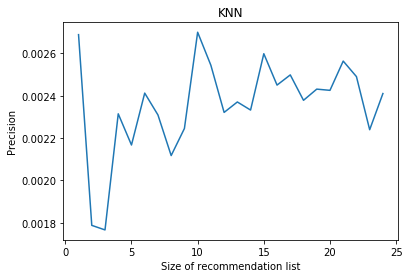

In [137]:
plot_func(tvals, precision_knn, "Size of recommendation list", "Precision", "KNN")

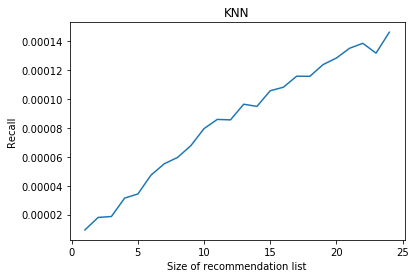

In [138]:
plot_func(tvals, recall_knn, "Size of recommendation list", "Recall", "KNN")

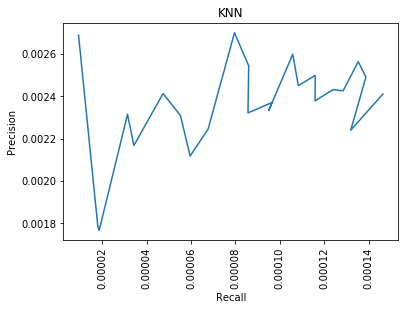

In [139]:
plot_func(recall_knn, precision_knn, "Recall", "Precision", "KNN",90)

### Question 37 

In [140]:
precision_nnmf, recall_nnmf = precision_recall(tvals, "nnmf")

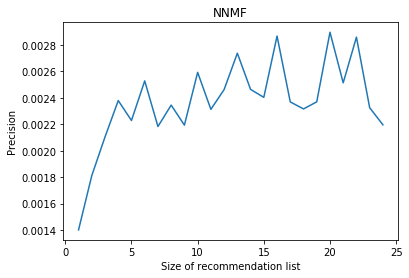

In [141]:
plot_func(tvals, precision_nnmf, "Size of recommendation list", "Precision", "NNMF")

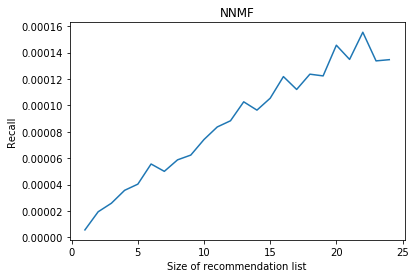

In [142]:
plot_func(tvals, recall_nnmf, "Size of recommendation list", "Recall", "NNMF")

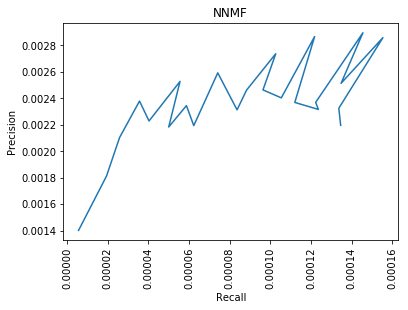

In [143]:
plot_func(recall_nnmf, precision_nnmf, "Recall", "Precision", "NNMF",90)

### Question 38

In [144]:
precision_mf, recall_mf = precision_recall(tvals, "mf")

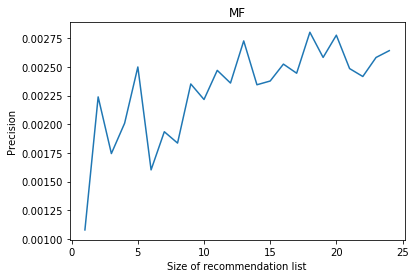

In [145]:
plot_func(tvals, precision_mf, "Size of recommendation list", "Precision", "MF")

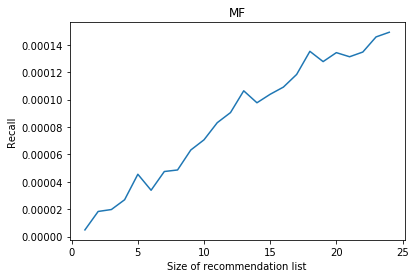

In [146]:
plot_func(tvals, recall_mf, "Size of recommendation list", "Recall", "MF")

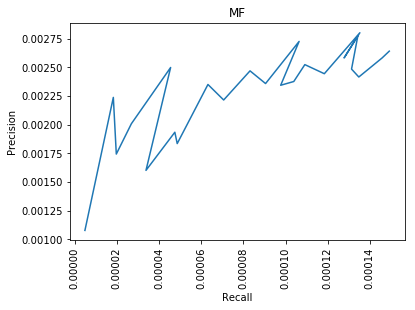

In [147]:
plot_func(recall_mf, precision_mf, "Recall", "Precision", "MF",90)

### Question 39 

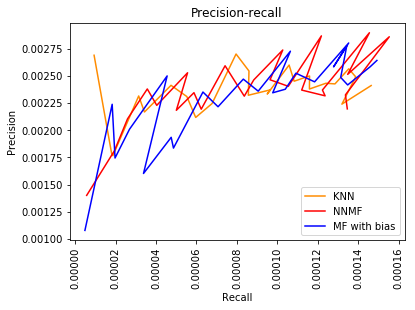

In [148]:
plt.figure()
plt.plot(recall_knn, precision_knn, color='darkorange', label='KNN')
plt.plot(recall_nnmf, precision_nnmf, color='red', label='NNMF')
plt.plot(recall_mf, precision_mf, color='blue', label='MF with bias')
plt.xticks(rotation=90)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall")
plt.legend()
plt.show()